In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [76]:
## drift coefficent
mu = 0.1
## number of steps
n = 1000
## time in years
T = 3
## number of sims
M = 4
# initial stock price
S0 = 100
#volatility
sigma = 0.3

$$ S_{t} = S_{0}e^{(\mu - \frac{\sigma^2}{2})t + \sigma W_{t}}$$

In [77]:
## calc ecch time step
dt = T/n

St = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(M, n)).T
)

St = np.vstack([np.ones(M), St])

St = S0 * St.cumprod(axis=0)

In [78]:
time = np.linspace(0, T, n + 1)

tt = np.full(shape=(M, n+1), fill_value=time).T

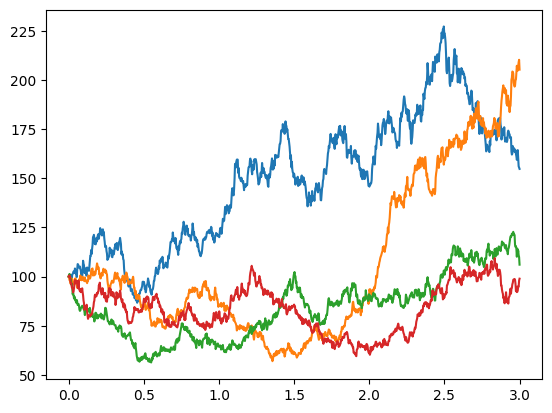

In [79]:
plt.plot(tt, St)
plt.show()

In [80]:
ts1 = St[:, 0]

In [81]:
ts1 = ts1.reshape(-1, 7)
Low = np.max(ts1, axis=1)
High = np.min(ts1, axis=1)
Open = ts1[:, 0]
Close = ts1[:, -1]

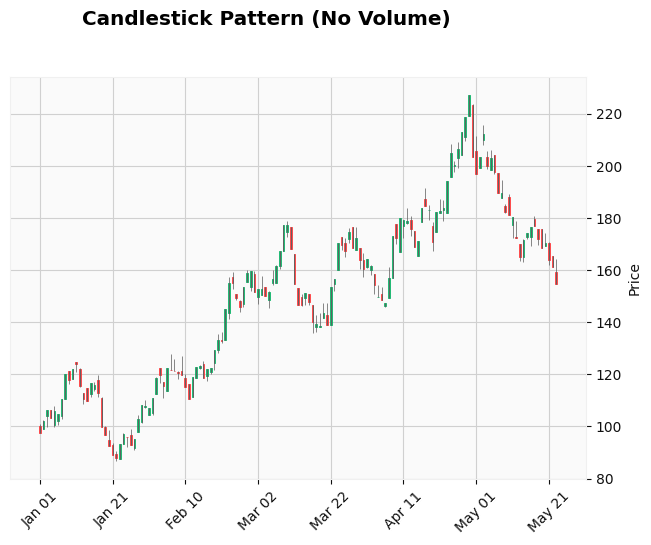

In [85]:
import pandas as pd
import mplfinance as mpf

# Sample OHLC data without timestamps and volume
data = {
    'Open': Open,
    'High': High, 
    'Low': Low, 
    'Close': Close
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a dummy date range to use as an index
df.index = pd.date_range(start="2023-01-01", periods=len(df), freq="D")

# Plot the candlestick chart
mpf.plot(df, type='candle', style='yahoo', title="Candlestick Pattern (No Volume)")
